In [3]:
!pip install qiskit qiskit-aer qiskit_ibm_runtime qiskit-algorithms pyqubo -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [8]:
%matplotlib inline

n =  4


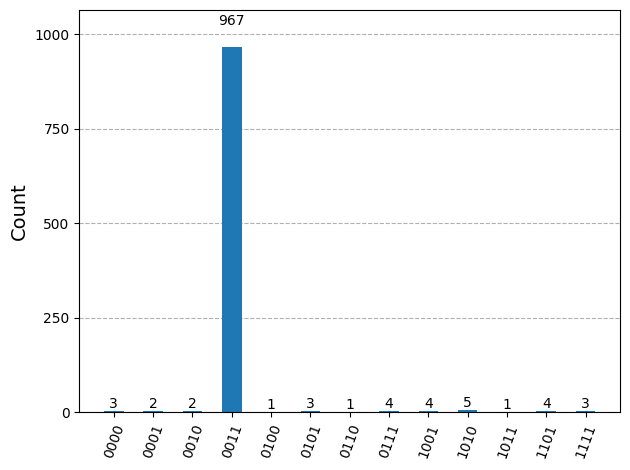

n =  5


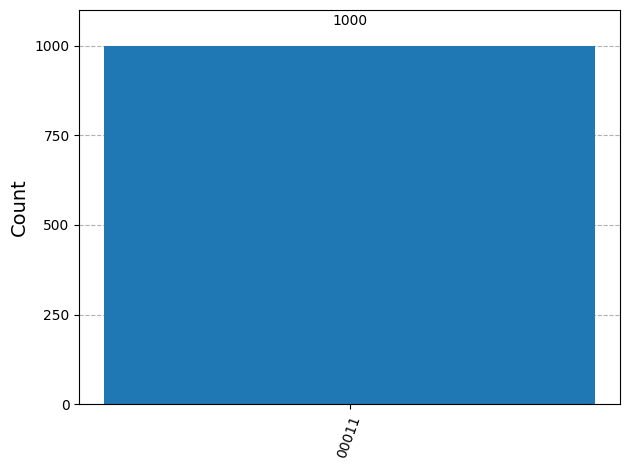

n =  6


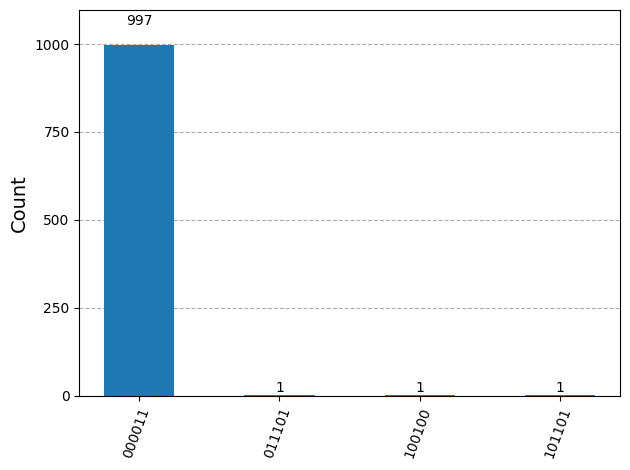

n =  7


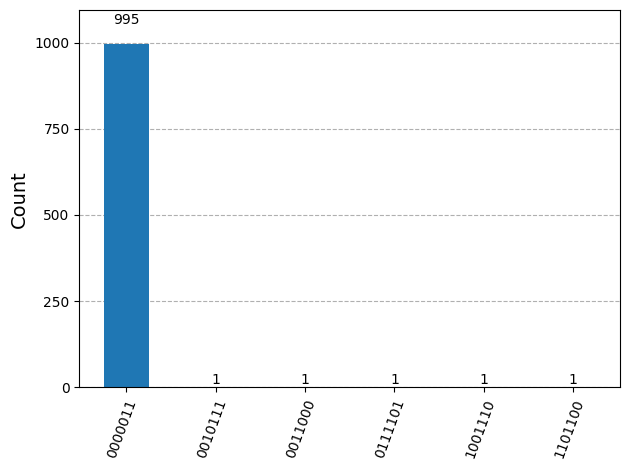

n =  8


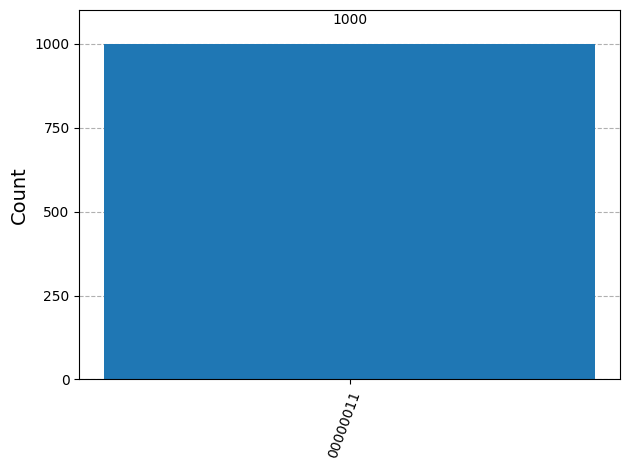

n =  9


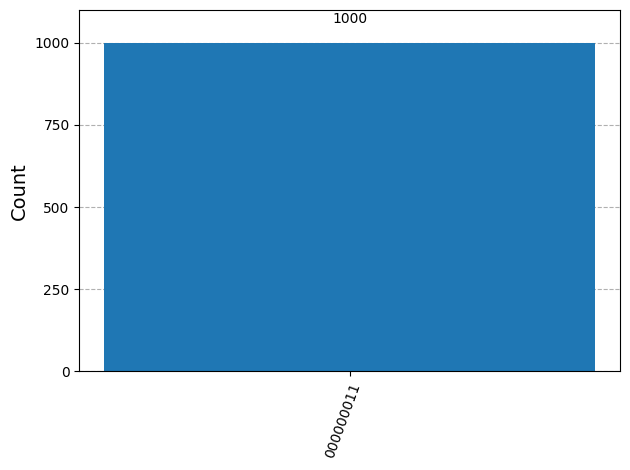

n =  10


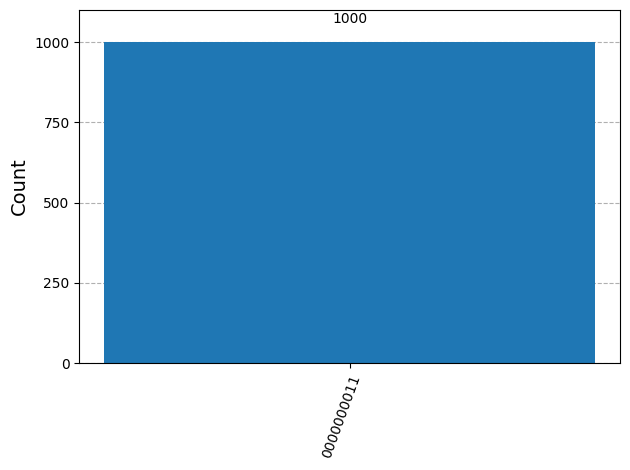

n =  11


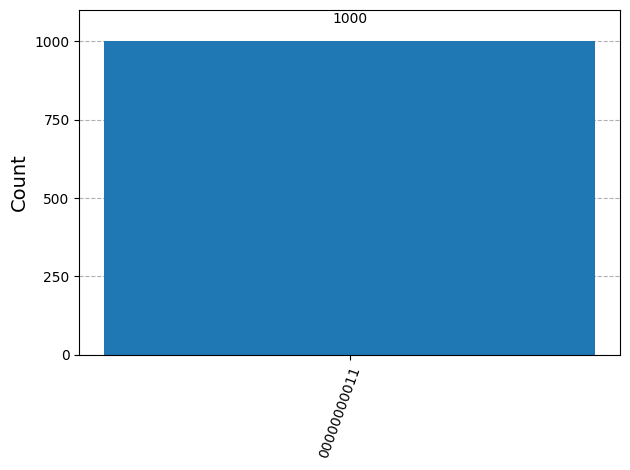

n =  12


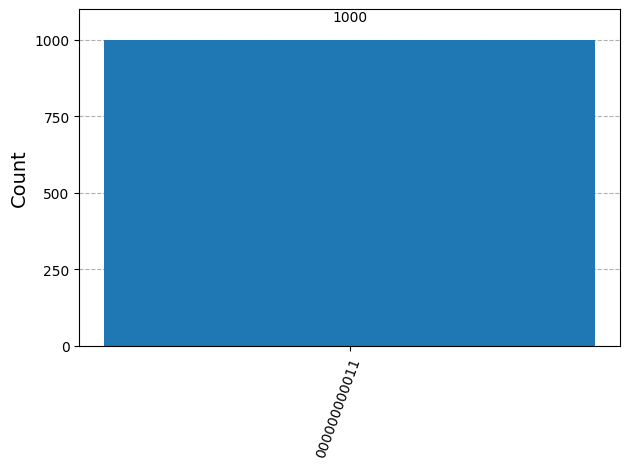

n =  13


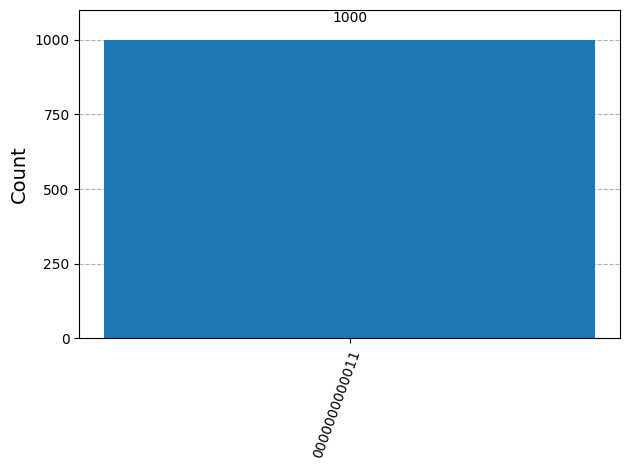

n =  14


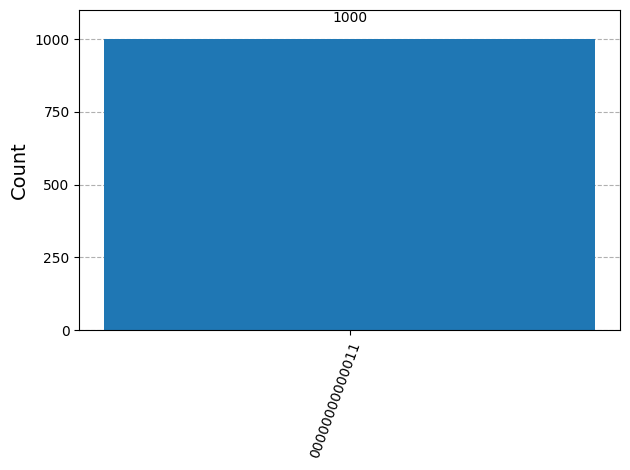

n =  15


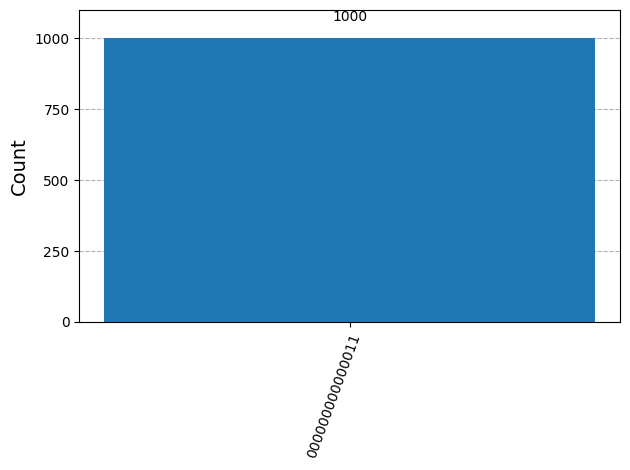

n =  16


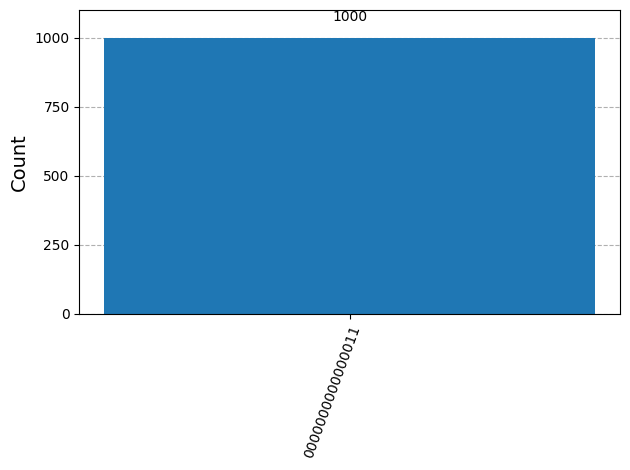

n =  17


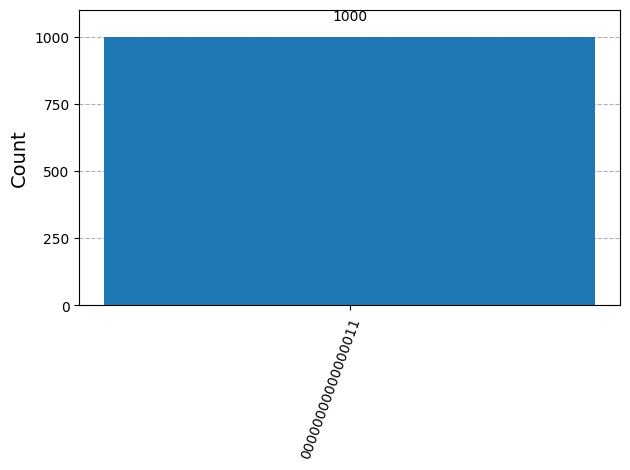

n =  18


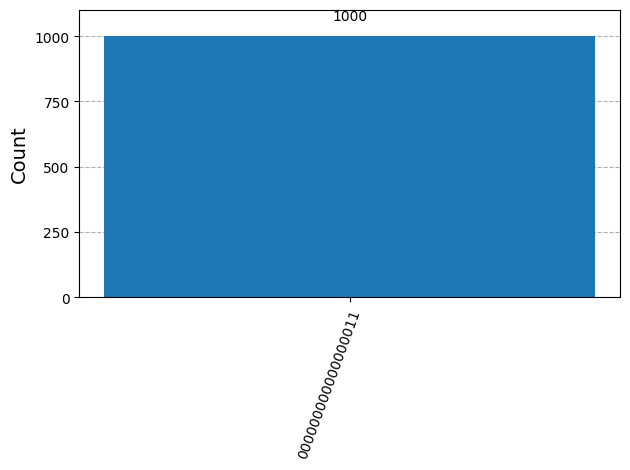

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt
import math

def grover_circuit(n_qubits: int, marked: int, n_iter: int = 1) -> QuantumCircuit:
    """
    Monta um circuito de Grover sobre n_qubits, marcando o estado 'marked',
    repetindo o algoritmo por n_iter iterações.
    """
    qc = QuantumCircuit(n_qubits, n_qubits)

    # 1) Preparação: superposição uniforme
    qc.h(range(n_qubits))

    # definimos alvo e controles para MCX
    target = 0
    controls = list(range(1, n_qubits))
    zero_positions = [i for i in range(n_qubits) if ((marked >> i) & 1) == 0]

    # 2) Loop de iterações de Grover
    for _ in range(n_iter):
        # 2a) Oráculo: inverte fase do estado |marked>
        qc.x(zero_positions)
        qc.h(target)
        qc.append(MCXGate(len(controls)), controls + [target])
        qc.h(target)
        qc.x(zero_positions)

        # 2b) Difusor (inversão em torno da média)
        qc.h(range(n_qubits))
        qc.x(range(n_qubits))
        qc.h(target)
        qc.append(MCXGate(len(controls)), controls + [target])
        qc.h(target)
        qc.x(range(n_qubits))
        qc.h(range(n_qubits))

    # 3) Medição
    qc.measure(range(n_qubits), range(n_qubits))

    return qc

if __name__ == "__main__":
    for i in range(4, 100):
        n = i
        N = 2 ** i
        i_ideal = (math.pi / 4) * math.sqrt(N)
        x0 = 0b0011  # estado marcado: |0011⟩
        qc = grover_circuit(n, x0, math.floor(i_ideal))

        #PARA MOSTRAR O CIRCUITO, DESCOMENTE A LINHA SEGUINTE
        #print(qc.draw(output='text'))


        # Simula
        # Use the updated AerSimulator
        simulator = AerSimulator()
        # Run the circuit
        result = simulator.run(qc, shots=1000).result()
        counts = result.get_counts()

        # Exibe resultados
        #print("Measurement results:", counts)
        print("n = ", n)
        fig = plot_histogram(counts)
        display(fig)